# 캐니 디렉토리 생성 후 분류 

In [2]:
%config Completer.use_jedi = False
import shutil
import random
import os
from glob import glob
#os.mkdir("./canny_boots_class")

In [3]:
base_path="./canny/Boots/"

In [5]:
os.listdir(base_path)

['Over the Knee', 'Ankle', 'Mid-Calf', 'Prewalker Boots', 'Knee High']

In [6]:
dir_list = ["Ankle","Knee High","Mid-Calf"]

In [7]:
for direc in dir_list:
    boots_shape=os.path.join(base_path,direc)
    new_boots = os.path.join("canny_boots_class/",direc)
    os.mkdir(new_boots)
    maker_list=os.listdir(boots_shape)
    for direc2 in maker_list:
        pic_direc=os.path.join(boots_shape,direc2)
        img_list=glob(pic_direc+"/*.jpg")
        random.shuffle(img_list)
        for src in img_list: 
            shutil.copy(src,new_boots)

# tsne 분류 (64x64)

In [9]:
%config Completer.use_jedi = False
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib import font_manager, rc
path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [29]:
img_test = cv2.imread("./canny_boots_class/Ankle/101178.238499.jpg")
img_test[img_test[...,0]>1]

array([[4, 4, 4],
       [2, 2, 2],
       [3, 3, 3],
       ...,
       [2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]], dtype=uint8)

In [11]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import copy

In [30]:
shoesimage = ImageDataGenerator()
gen_image=shoesimage.flow_from_directory(directory="./canny_boots_class/"
                                        ,target_size=(64,64)
                                        ,color_mode='grayscale'
                                        ,batch_size=10000)

Found 12781 images belonging to 3 classes.


In [31]:
batch_data = []
for i,image in enumerate(gen_image):
    if i == 2:
        break
    batch_data.append(image)

In [32]:
dt=batch_data[0][0]

In [33]:
dt.shape

(10000, 64, 64, 1)

In [34]:
flatten = []
for i in dt[...,0]:
    flatten.append(i.flatten())
flatten = np.array(flatten)    
    

In [35]:
flatten.shape

(10000, 4096)

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

# TSNE에는 transform 메서드가 없으므로 대신 fit_transform 사용
digits_tsne = tsne.fit_transform(flatten)

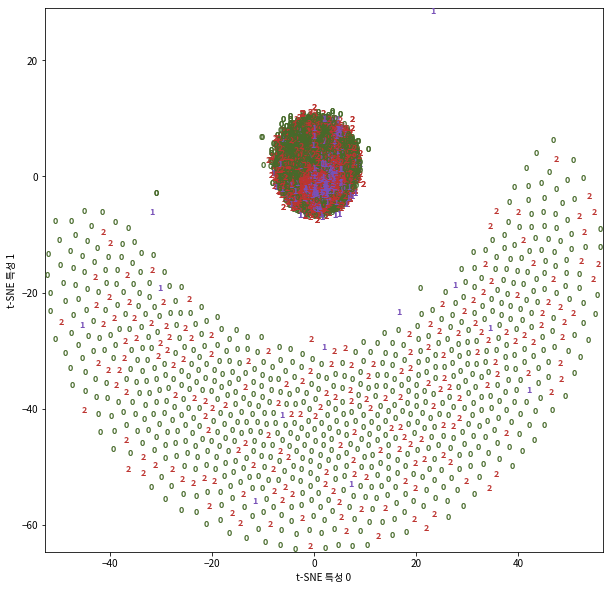

In [37]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits_tsne)):
    # 숫자 텍스트를 이용해 산점도 그리기
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(np.argmax(batch_data[0][1][i])),
             color = colors[np.argmax(batch_data[0][1][i])], fontdict={'weight':'bold', 'size':9})
    
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()

# tsne 분류 (98x98)

In [20]:
shoesimage = ImageDataGenerator(rescale=1/255.0)
gen_image=shoesimage.flow_from_directory(directory="./canny_boots_class/"
                                        ,target_size=(98,98)
                                        ,color_mode='grayscale'
                                        ,batch_size=10000)

Found 12781 images belonging to 3 classes.


In [21]:
batch_data = []
for i,image in enumerate(gen_image):
    if i == 2:
        break
    batch_data.append(image)

In [22]:
dt=batch_data[0][0]

In [23]:
flatten = []
for i in dt[...,0]:
    flatten.append(i.flatten())
flatten = np.array(flatten)    
    

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

# TSNE에는 transform 메서드가 없으므로 대신 fit_transform 사용
digits_tsne = tsne.fit_transform(flatten)

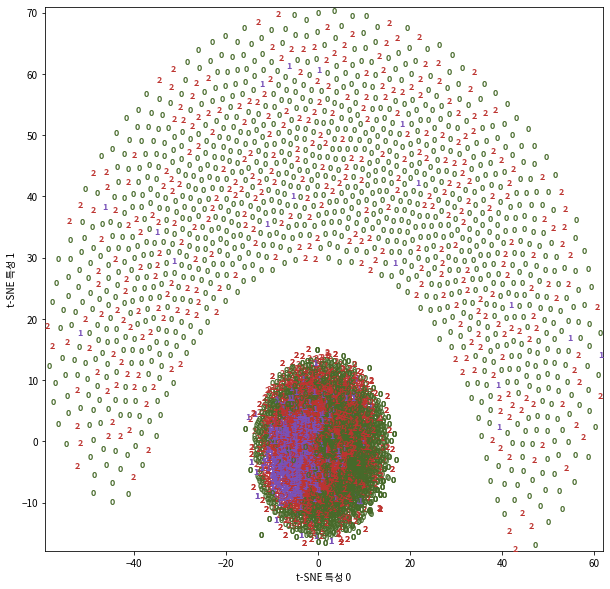

In [25]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits_tsne)):
    # 숫자 텍스트를 이용해 산점도 그리기
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(np.argmax(batch_data[0][1][i])),
             color = colors[np.argmax(batch_data[0][1][i])], fontdict={'weight':'bold', 'size':9})
    
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()

# PCA로 해보자 ~

In [38]:
shoesimage = ImageDataGenerator()
gen_image=shoesimage.flow_from_directory(directory="./canny_boots_class/"
                                        ,target_size=(64,64)
                                        ,color_mode='grayscale'
                                        ,batch_size=10000)
batch_data = []
for i,image in enumerate(gen_image):
    if i == 2:
        break
    batch_data.append(image)
dt=batch_data[0][0]
flatten = []
for i in dt[...,0]:
    flatten.append(i.flatten())
flatten = np.array(flatten) 

Found 12781 images belonging to 3 classes.


/home/godeung/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/godeung/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


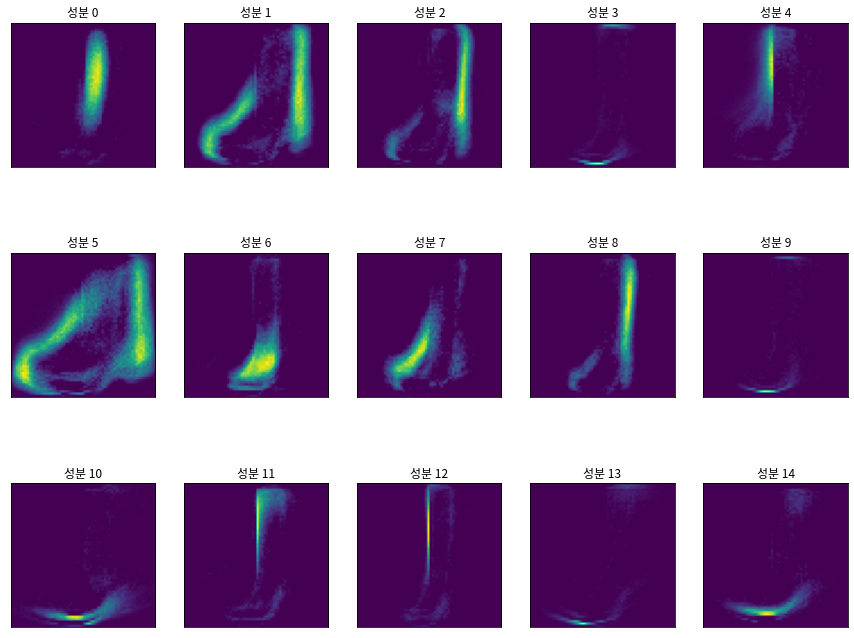

In [40]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0) # 랜덤 시드를 0으로 설정
nmf.fit(flatten)
X_train_nmf = nmf.transform(flatten)
X_test_nmf = nmf.transform(flatten)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape((64,64)))
    ax.set_title("성분 {}".format(i))